### What is Explanatory Data Analysis (EDA) ?
`Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.`
- Now let's see how to implement EDA on a Dataset(I have used Car Features Dataset from Kaggle)

### 1. Importing required libraries

In [1]:
# importing library for analyzing data
import pandas as pd

# importing library for numerical computations
import numpy as np

# importing libraries for visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Loading the Dataset

In [2]:
# Reading the dataset
df = pd.read_csv("Car Features Dataset.csv")

# Displaying headers and a specified number of rows, starting from the top. 
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
# Displaying the headers and a specified number of rows, starting from the bottom.
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


### 3. Checking complete information about the Dataset

In [4]:
print(df.info())
""" Here in this dataset Engine Fuel Type, Engine Hp, Engine Cylinders, Number of doors, and
Market Category are having Null Values """

# finding number of Null values 
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

### 4. Dropping the irrelevant columns

In [5]:
df = df.drop(["Engine Fuel Type", "Market Category", "Vehicle Style", "Popularity", "Number of Doors", "Vehicle Size"], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


### 5. Dropping the duplicate rows

In [6]:
# Checking the shape
df.shape

# dropping the duplicate rows
df = df.drop_duplicates()
df.head(5)

# finding number of rows present after removing duplicates
print(df.count())

# finding number of Null values 
print(df.isnull().sum())

Make                 10925
Model                10925
Year                 10925
Engine HP            10856
Engine Cylinders     10895
Transmission Type    10925
Driven_Wheels        10925
highway MPG          10925
city mpg             10925
MSRP                 10925
dtype: int64
Make                  0
Model                 0
Year                  0
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
highway MPG           0
city mpg              0
MSRP                  0
dtype: int64


### 6. Dropping Null values

In [7]:
# Here in this dataset Engine Hp and Engine Cylinders are having Null Values.
# Dropping null values
df = df.dropna() 
print(df.count())

# finding number of Null values 
print(df.isnull().sum())

Make                 10827
Model                10827
Year                 10827
Engine HP            10827
Engine Cylinders     10827
Transmission Type    10827
Driven_Wheels        10827
highway MPG          10827
city mpg             10827
MSRP                 10827
dtype: int64
Make                 0
Model                0
Year                 0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
highway MPG          0
city mpg             0
MSRP                 0
dtype: int64


<AxesSubplot:>

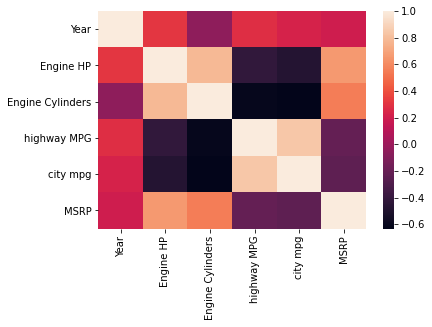

In [8]:
# finding the relationship between columns
sns.heatmap(df.corr())

### 7. Detecting Outliers

- An outlier is an observation point that is distant from other observations.
- For now i will be using visualization tools for dectecting outliers.
`Box-Plot`

<AxesSubplot:xlabel='MSRP'>

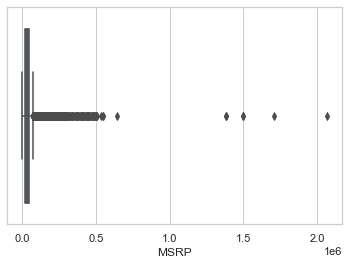

In [9]:
sns.set(style="whitegrid")
sns.boxplot(x = df['MSRP'])

<AxesSubplot:xlabel='Engine HP'>

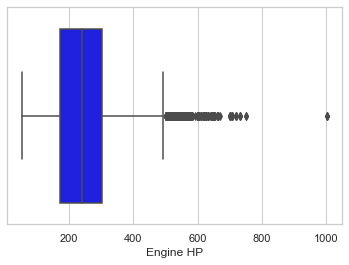

In [10]:
sns.boxplot(x = df['Engine HP'],color="blue")

<AxesSubplot:xlabel='Engine Cylinders'>

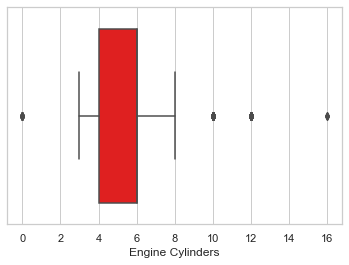

In [11]:
sns.boxplot(x = df['Engine Cylinders'],color="red")

### 8. Removing Outliers
- Using IQR Score

In [12]:
def rmv_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df.shape

In [13]:
rmv_outliers(df)
# shape of dataset after removing outliers.

(9191, 10)

### Finally Visualizing Engine HP VS Price

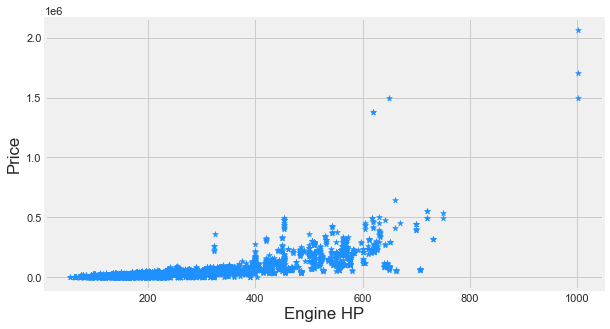

In [14]:
plt.figure(figsize=(10,5))
plt.style.use('fivethirtyeight')
plt.scatter(df['Engine HP'], df['MSRP'],marker="*",color="dodgerblue")
plt.xlabel('Engine HP')
plt.ylabel('Price')
plt.show()